In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from collections import defaultdict
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import pydotplus
from sklearn import tree
from IPython.display import Image

In [2]:
#Importing the dataset 
df=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleaned.csv")
test=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest.csv")
test2=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest2.csv")

In [3]:
#Drop the useless column
df.drop(['Unnamed: 0'], axis=1, inplace =True)
df.drop(['date'], axis=1, inplace =True)
df.drop(['DayName'], axis=1, inplace =True)

test.drop(['Unnamed: 0'], axis=1, inplace =True)
test.drop(['date'], axis=1, inplace =True)
test.drop(['DayName'], axis=1, inplace =True)

test2.drop(['Unnamed: 0'], axis=1, inplace =True)
test2.drop(['date'], axis=1, inplace =True)
test2.drop(['DayName'], axis=1, inplace =True)

In [16]:
#preparing the two datasets splitting the attributes with the class and selecting the right attributes
attributes = ['Light', 'CO2']
X_train = df[attributes]
y_train = df['Occupancy']

#attributes = [col for col in test.columns if col == 'Light' or 'CO2']
X_test = test[attributes]
y_test = test['Occupancy']

#attributes = [col for col in test2.columns if col == 'Light' or 'CO2']
X_test2 = test2[attributes]
y_test2 = test2['Occupancy']

In [17]:
X_train.head()

,Light,CO2
0,1.0,721.25
1,1.0,714.00
2,1.0,713.50
3,1.0,708.25
4,1.0,704.50


In [18]:
#Avoid the warnings
import warnings
warnings.simplefilter("ignore")

In [19]:
clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=4, min_samples_split=2, 
                             min_samples_leaf=1, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy 0.9782363977485928
F1-score [0.98262433 0.97088353]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

[[1640   53]
 [   5  967]]


In [21]:
#Print the roc value

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

0.9817752960021779


In [7]:
clf = RandomForestClassifier(criterion='gini', max_depth=3, min_samples_split=2, 
                             min_samples_leaf=1,random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy 0.9782363977485928
F1-score [0.98262433 0.97088353]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

[[1640   53]
 [   5  967]]


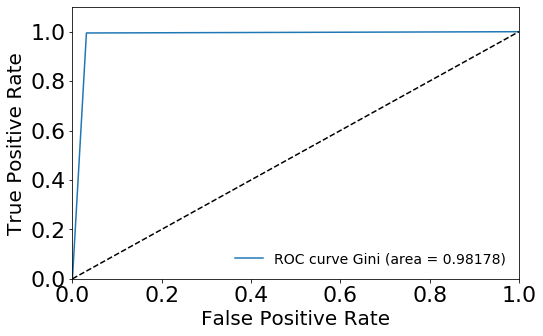

In [23]:
#Plotting the graph of the Roc curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve Gini (area = %0.5f)' % roc_auc)
#plt.plot(fprE, tprE, label='ROC curve Gain (area = %0.5f)' % (roc_aucE))
#plt.plot(fprRF, tprRF, label='ROC curve Random Forest (area = %0.5f)' % (roc_aucRF))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

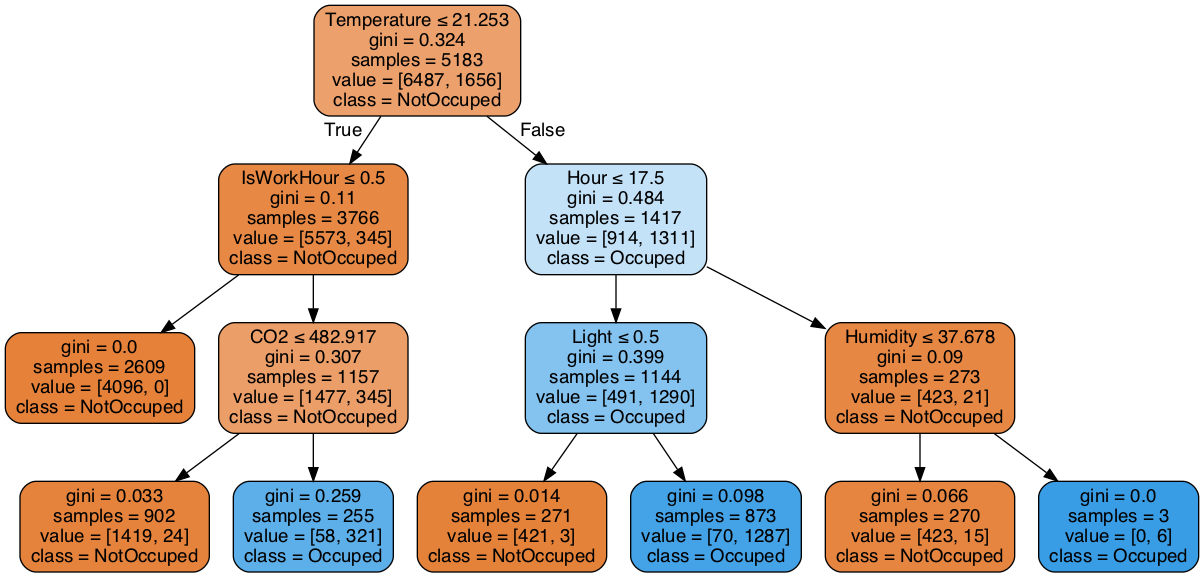

In [8]:
#Let's see the decision tree
dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
                                feature_names=attributes, 
                                class_names=['NotOccuped' if x == 0 else 'Occuped' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

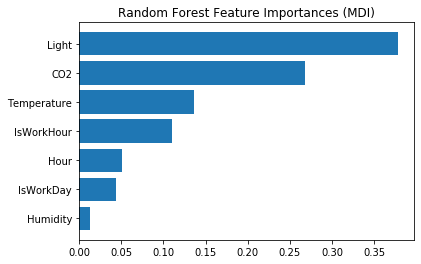

In [9]:
nbr_features = 8

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(attributes)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [10]:
#view the importace of the attributes
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

IsWorkDay 0.04406176225055056
Hour 0.05096041791810824
IsWorkHour 0.10990843528000722
Temperature 0.13574024486317923
Humidity 0.013010188677524586
Light 0.3781545947839875
CO2 0.2681643562266428


In [11]:
from sklearn.inspection import permutation_importance

In [12]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

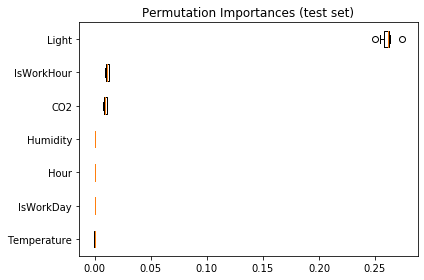

In [13]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(attributes)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

features_combs_list = [
    ('IsWorkDay', 'Hour', 'IsWorkHour', 'Temperature', 'Humidity', 'Light', 'CO2'),
    ('IsWorkDay', 'Hour', 'IsWorkHour', 'Temperature', 'Light', 'CO2'),
    ('IsWorkHour', 'Temperature', 'Light', 'CO2'),
    ('Temperature', 'Light', 'CO2'),
    ('Light', 'CO2')
]

hyper_params_space = [
    {
        'n_estimators': [5, 8, 10, 13, 15, 18, 20, 30, 40, 50, 60, 80, 100],
        'max_depth': np.arange(2,5),
        'min_samples_split': np.arange(2,5),
        'criterion': ['gini', 'entropy'],
        'min_samples_leaf': np.arange(1,5),
        'random_state': [0]
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t = X_test.loc[:, features]
    X_t2 = X_test2.loc[:, features]

    tree = GridSearchCV(RandomForestClassifier(), hyper_params_space,
                       scoring='accuracy')
    tree.fit(X, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print()
    
    preds = [
        (tree.predict(X), y_train, 'Train'),
        (tree.predict(X_t), y_test, 'Test1'),
        (tree.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print('Accuracy %s' % accuracy_score(pred[1], pred[0]))
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('IsWorkDay', 'Hour', 'IsWorkHour', 'Temperature', 'Humidity', 'Light', 'CO2')
Best parameters set:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 0}

Train Classification Report:

Accuracy 0.9888247574603954

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6414
           1       0.96      0.99      0.97      1729

    accuracy                           0.99      8143
   macro avg       0.98      0.99      0.98      8143
weighted avg       0.99      0.99      0.99      8143


Train Confusion Matrix:
[[6335   79]
 [  12 1717]]

Test1 Classification Report:

Accuracy 0.9782363977485928

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weig